# Sales Prediction with Random Forest and XGBoost

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
    

## Load and Explore Data

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB

Missing Values:
Item_Identifie

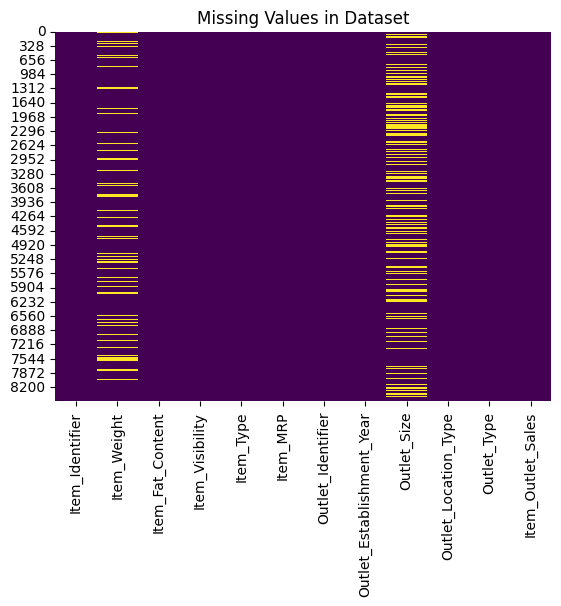

In [2]:

# Load the dataset
data = pd.read_csv("train_v9rqX0R.csv")

# Display basic data insights
print("Dataset Info:")
data.info()
print("\nMissing Values:")
print(data.isnull().sum())
print("\nSummary Statistics:")
print(data.describe())

# Visualizing missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Dataset")
plt.show()
    

## Handle Missing Values and Feature Engineering

In [3]:

# Handle missing values
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)

# Feature Engineering: Convert Outlet Establishment Year to store age
data['Outlet_Age'] = 2025 - data['Outlet_Establishment_Year']
data.drop(columns=['Outlet_Establishment_Year'], inplace=True)
    

C:\Users\hp\AppData\Local\Temp\ipykernel_22912\3880342791.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_22912\3880342791.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

## Data Analysis and Visualization

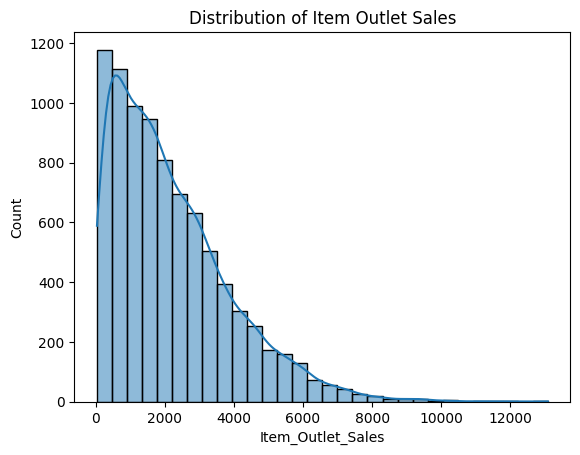

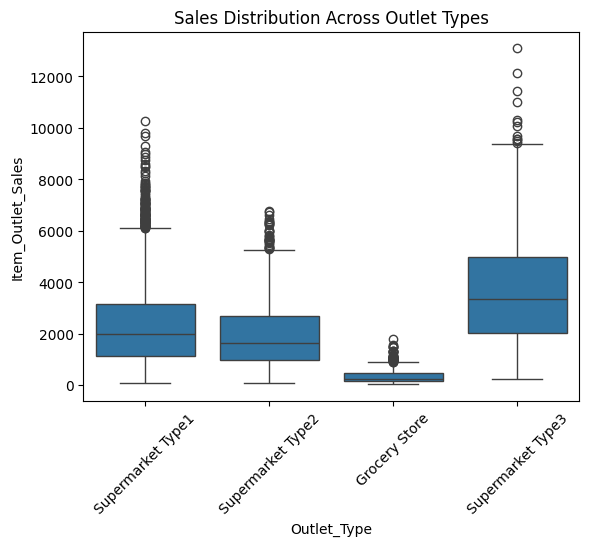

In [4]:

# Data distribution plots
sns.histplot(data['Item_Outlet_Sales'], bins=30, kde=True)
plt.title("Distribution of Item Outlet Sales")
plt.show()

sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data)
plt.xticks(rotation=45)
plt.title("Sales Distribution Across Outlet Types")
plt.show()
    

## Encode Categorical Variables

In [5]:

# Encode categorical variables
categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
ohe = OneHotEncoder(drop='first', sparse_output=False)
categorical_transformed = ohe.fit_transform(data[categorical_cols])
categorical_df = pd.DataFrame(categorical_transformed, columns=ohe.get_feature_names_out())

# Merge encoded features and drop original categorical columns
data = pd.concat([data.drop(columns=categorical_cols), categorical_df], axis=1)
    

## Train and Save Models

## Predict on New Test Data

In [6]:
predict_sales(r"C:\Users\hp\OneDrive\Desktop\Sales_Prediction_for_Big_Mart_Outlets\test_AbJTz2l.csv", "xgboost_model.pkl")

NameError: name 'predict_sales' is not defined

In [7]:
import pandas as pd
import os

def convert_predictions_format(predicted_csv, test_csv, output_csv):
    # Load the predicted and test CSVs
    df_pred = pd.read_csv(predicted_csv)
    df_test = pd.read_csv(test_csv)
    
    # Identify outlet identifier columns (one-hot encoded)
    outlet_cols = [col for col in df_pred.columns if col.startswith("Outlet_Identifier_")]
    
    # Extract Outlet Identifier from one-hot encoding
    df_pred["Outlet_Identifier"] = df_pred[outlet_cols].idxmax(axis=1).str.replace("Outlet_Identifier_", "")
    
    # Drop one-hot encoded outlet columns
    df_pred = df_pred.drop(columns=outlet_cols)
    
    # Ensure 'Item_Identifier' is taken from test data
    df_pred["Item_Identifier"] = df_test["Item_Identifier"]
    
    # Select only required columns
    df_final = df_pred[["Item_Identifier", "Outlet_Identifier", "Predicted_Sales"]]
    
    # Rename columns to match sample format
    df_final.rename(columns={"Predicted_Sales": "Item_Outlet_Sales"}, inplace=True)
    
    # Handle PermissionError by saving with a unique name if needed
    try:
        df_final.to_csv(output_csv, index=False)
        print(f"Converted CSV saved to {output_csv}")
    except PermissionError:
        backup_output_csv = output_csv.replace(".csv", "_backup.csv")
        df_final.to_csv(backup_output_csv, index=False)
        print(f"Permission denied for {output_csv}. Saved as {backup_output_csv} instead.")

# Example usage
convert_predictions_format("predicted_sales_Xgboost.csv", "test_AbJTz2l.csv", "xgb_predictions.csv")


Converted CSV saved to xgb_predictions.csv


C:\Users\hp\AppData\Local\Temp\ipykernel_22912\145332855.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.rename(columns={"Predicted_Sales": "Item_Outlet_Sales"}, inplace=True)
